# Практична робота №2
### Студента групи МІТ-31
### Переверзева Олексія

In [546]:
# Спочатку імпортуємо необхідні бібліотеки: NumPy для роботи з числовими даними, 
# Pandas для обробки і аналізу даних та Matplotlib для візуалізації результатів.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Генерація випадкових даних

In [547]:
# Генерація випадкових даних
np.random.seed(100) # Щоб мати однакові результати при кожному запуску
n_samples = 100 # Кількість рядків (зразків)
n_features = 2 # Кількість ознак

data = np.random.randint(10000, 99999, size=(n_samples, n_features))
columns = ['Feature 1', 'Feature 2', 'Category']

# Випадковий тип категорії (0 - не затверджено, 1 - затверджено) - вектор цільової змінної
vector_category = np.random.choice([0, 1], size=(n_samples, 1))

# Матриця ознак
matrix_f = np.column_stack((data, vector_category)) # Об'єднуємо числові та категорійні ознаки, як матрицю ознак X 

df = pd.DataFrame(matrix_f, columns=columns)
df.to_csv('data.csv', index=False)

print('Дані з CSV файлу: \n')
data = pd.read_csv('data.csv')
print(data)

Дані з CSV файлу: 

    Feature 1  Feature 2  Category
0       48408      66088         1
1       89683      87655         1
2       75615      91840         0
3       73370      92270         0
4       24260      85618         1
..        ...        ...       ...
95      16327      10083         0
96      44346      49672         0
97      45574      32309         1
98      11648      21984         1
99      99955      29774         1

[100 rows x 3 columns]


Вивід даних

In [548]:
# Вивести інформацію про дані, такі як кількість рядків, стовпців і типи даних
print("\nІнформація:\n")
print(data.info())

# Вивести основні статистичні показники даних
print("\nСтатистика:\n")
print(data.describe())


Інформація:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Feature 1  100 non-null    int64
 1   Feature 2  100 non-null    int64
 2   Category   100 non-null    int64
dtypes: int64(3)
memory usage: 2.5 KB
None

Статистика:

          Feature 1     Feature 2    Category
count    100.000000    100.000000  100.000000
mean   54860.910000  53545.780000    0.520000
std    27479.785864  26316.154191    0.502117
min    10488.000000  10083.000000    0.000000
25%    31166.000000  31027.750000    0.000000
50%    53418.000000  50213.500000    1.000000
75%    78967.250000  80517.000000    1.000000
max    99955.000000  98755.000000    1.000000


Підготовка даних

In [549]:
# Обробка пропущених значень (якщо вони є)
data = data.dropna()

# Вибір функцій (ознак) для аналізу та цільової змінної
X = data[['Feature 1', 'Feature 2']]
y = data['Category']

# Розділення даних на тренувальний і тестовий набори
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=55)

Використовуємо модель LogisticRegression

In [550]:
from sklearn.linear_model import LinearRegression

# Створення та навчання моделі
model_lr = LinearRegression().fit(X_train, y_train)

# Оцінка моделі на тестових даних
y_pred_lr = model_lr.predict(X_test).round()

Оцінка моделі

In [551]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report

# Обчислення середньо-квадратичної помилки (MSE)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print('LogisticRegression Mean Squared Error: ', mse_lr)

# Обчислення R-squared
r2_lr = r2_score(y_test, y_pred_lr)
print('\nLogisticRegression R-squared: ', r2_lr)

# Оцінка точності моделі
acc_lr = accuracy_score(y_test, y_pred_lr)
print("\nТочність моделі LogisticRegression: ", acc_lr)

# Виведення матриці неправильно класифікованих прикладів
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
print("\nМатриця неправильно класифікованих прикладів, LogisticRegression:\n", conf_matrix_lr)

# Виведення звіту про класифікацію
class_report_lr = classification_report(y_test, y_pred_lr)
print("\nЗвіт про класифікацію для LogisticRegression:\n", class_report_lr)

LogisticRegression Mean Squared Error:  0.6333333333333333

LogisticRegression R-squared:  -1.5446428571428568

Точність моделі LogisticRegression:  0.36666666666666664

Матриця неправильно класифікованих прикладів, LogisticRegression:
 [[ 3 11]
 [ 8  8]]

Звіт про класифікацію для LogisticRegression:
               precision    recall  f1-score   support

           0       0.27      0.21      0.24        14
           1       0.42      0.50      0.46        16

    accuracy                           0.37        30
   macro avg       0.35      0.36      0.35        30
weighted avg       0.35      0.37      0.36        30



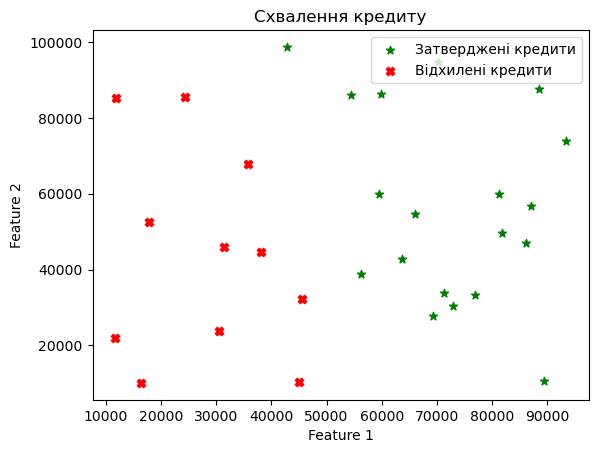

In [552]:
# Візуалізація реальних та прогнозованих значень
a_category = X_test[y_pred_lr == 1]
r_category = X_test[y_pred_lr == 0]

# Графік для затверджених кредитів
plt.scatter(a_category.iloc[:, 0], a_category.iloc[:, 1], label='Затверджені кредити', c='green', marker='*')

# Графік для відхилених кредитів
plt.scatter(r_category.iloc[:, 0], r_category.iloc[:, 1], label='Відхилені кредити', c='red', marker='X')

plt.title('Схвалення кредиту')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='best')
plt.show()

Спробуємо інші моделі

Support Vector Machine

SVM Mean Squared Error:  0.5666666666666667

SVM R-squared:  -1.276785714285714

Точність моделі SVM:  0.43333333333333335

Матриця неправильно класифікованих прикладів, SVM:
 [[ 2 12]
 [ 5 11]]

Звіт про класифікацію для SVM:
               precision    recall  f1-score   support

           0       0.29      0.14      0.19        14
           1       0.48      0.69      0.56        16

    accuracy                           0.43        30
   macro avg       0.38      0.42      0.38        30
weighted avg       0.39      0.43      0.39        30



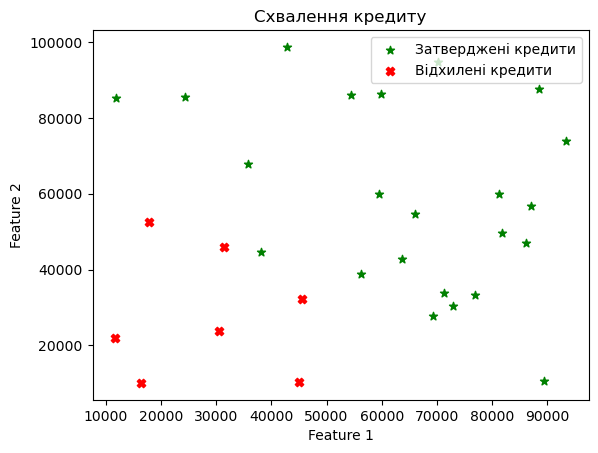

In [553]:
# SVM -  шукає гіперплощину в просторі ознак, що найкраще розділяє дані на класи
from sklearn import svm

model_svm = svm.SVC(kernel='linear').fit(X_train, y_train)
y_pred_svm = model_svm.predict(X_test)

mse_svm = mean_squared_error(y_test, y_pred_svm)
print('SVM Mean Squared Error: ', mse_svm)

r2_svm = r2_score(y_test, y_pred_svm)
print('\nSVM R-squared: ', r2_svm)

acc_svm = accuracy_score(y_test, y_pred_svm)
print("\nТочність моделі SVM: ", acc_svm)

conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("\nМатриця неправильно класифікованих прикладів, SVM:\n", conf_matrix_svm)

class_report_svm = classification_report(y_test, y_pred_svm)
print("\nЗвіт про класифікацію для SVM:\n", class_report_svm)

a_category = X_test[y_pred_svm == 1]
r_category = X_test[y_pred_svm == 0]

# Графік для затверджених кредитів
plt.scatter(a_category.iloc[:, 0], a_category.iloc[:, 1], label='Затверджені кредити', c='green', marker='*')

# Графік для відхилених кредитів
plt.scatter(r_category.iloc[:, 0], r_category.iloc[:, 1], label='Відхилені кредити', c='red', marker='X')

plt.title('Схвалення кредиту')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='best')
plt.show()

DecisionTreeClassifier

DTC Mean Squared Error:  0.5

DTC R-squared:  -1.0089285714285712

Точність моделі DTC:  0.5

Матриця неправильно класифікованих прикладів, DTC:
 [[7 7]
 [8 8]]

Звіт про класифікацію для DTC:
               precision    recall  f1-score   support

           0       0.47      0.50      0.48        14
           1       0.53      0.50      0.52        16

    accuracy                           0.50        30
   macro avg       0.50      0.50      0.50        30
weighted avg       0.50      0.50      0.50        30



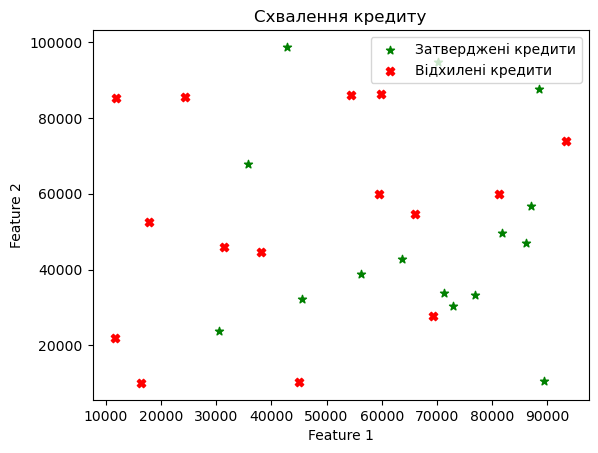

In [554]:
from sklearn.tree import DecisionTreeClassifier

model_dtc = DecisionTreeClassifier().fit(X_train, y_train)
y_pred_dtc = model_dtc.predict(X_test)

mse_dtc = mean_squared_error(y_test, y_pred_dtc)
print('DTC Mean Squared Error: ', mse_dtc)

r2_dtc = r2_score(y_test, y_pred_dtc)
print('\nDTC R-squared: ', r2_dtc)

acc_dtc = accuracy_score(y_test, y_pred_dtc)
print("\nТочність моделі DTC: ", acc_dtc)

conf_matrix_dtc = confusion_matrix(y_test, y_pred_dtc)
print("\nМатриця неправильно класифікованих прикладів, DTC:\n", conf_matrix_dtc)

class_report_dtc = classification_report(y_test, y_pred_dtc)
print("\nЗвіт про класифікацію для DTC:\n", class_report_dtc)

a_category = X_test[y_pred_dtc == 1]
r_category = X_test[y_pred_dtc == 0]

# Графік для затверджених кредитів
plt.scatter(a_category.iloc[:, 0], a_category.iloc[:, 1], label='Затверджені кредити', c='green', marker='*')

# Графік для відхилених кредитів
plt.scatter(r_category.iloc[:, 0], r_category.iloc[:, 1], label='Відхилені кредити', c='red', marker='X')

plt.title('Схвалення кредиту')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='best')
plt.show()

RandomForestClassifier

RFC Mean Squared Error:  0.4666666666666667

RFC R-squared:  -0.8749999999999998

Точність моделі RFC:  0.5333333333333333

Матриця неправильно класифікованих прикладів, RFC:
 [[8 6]
 [8 8]]

Звіт про класифікацію для RFC:
               precision    recall  f1-score   support

           0       0.50      0.57      0.53        14
           1       0.57      0.50      0.53        16

    accuracy                           0.53        30
   macro avg       0.54      0.54      0.53        30
weighted avg       0.54      0.53      0.53        30



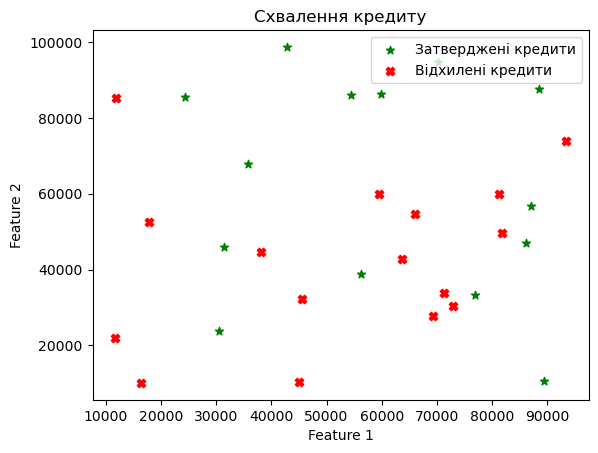

In [555]:
from sklearn.ensemble import RandomForestClassifier

# Створення моделі випадкового лісу
model_rfc = RandomForestClassifier(n_estimators=100, random_state=30).fit(X_train, y_train)

# Оцінка моделі на тестових даних
y_pred_rfc = model_rfc.predict(X_test)

mse_rfc = mean_squared_error(y_test, y_pred_rfc)
print('RFC Mean Squared Error: ', mse_rfc)

r2_rfc = r2_score(y_test, y_pred_rfc)
print('\nRFC R-squared: ', r2_rfc)

acc_rfc = accuracy_score(y_test, y_pred_rfc)
print("\nТочність моделі RFC: ", acc_rfc)

conf_matrix_rfc = confusion_matrix(y_test, y_pred_rfc)
print("\nМатриця неправильно класифікованих прикладів, RFC:\n", conf_matrix_rfc)

class_report_rfc = classification_report(y_test, y_pred_rfc)
print("\nЗвіт про класифікацію для RFC:\n", class_report_rfc)

a_category = X_test[y_pred_rfc == 1]
r_category = X_test[y_pred_rfc == 0]

# Графік для затверджених кредитів
plt.scatter(a_category.iloc[:, 0], a_category.iloc[:, 1], label='Затверджені кредити', c='green', marker='*')

# Графік для відхилених кредитів
plt.scatter(r_category.iloc[:, 0], r_category.iloc[:, 1], label='Відхилені кредити', c='red', marker='X')

plt.title('Схвалення кредиту')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='best')
plt.show()